In [1]:
#sin, cos phasor, 오일러 phasor 배움
#이번시간 개념 빠진 것들 하나하나 다 살펴볼 것임

In [2]:
#저번시간 라이브러리import 한 것들

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

In [3]:
#첫번째 줄 ploting할 때 쓰는 것, 제일 큰 라이브러리가 matplotlib이라는 것이고
#from으로 부를 때는 제일 큰 라이브러리가 있고 그 밑에 하위 라이브러리가 있다는 것을 알고 있어야함
#시험문제 - 똑같은 역할 하는게 뭐냐? import matplotlㅑb.pyplot과 똑같은 것임
#두번째 줄 - 3d plot을 해야할지도 모름. 오일러 function을 쓰면 회전하면서 3d같이 된다. 
#이 두개가 제일 중요하고 이것들 그냥 sound에서 copy해서 쓴다 생각하자

# Phasor

In [34]:
#parameter setting (미리 변수에다가 값을 담아놓아야함)
#왜냐면 나중에 바꿀 때 나중에 결과 값이 쉽게 바꿀 수 있기 때문에
#지금은 parameter라고 부르고, 일반적으로 python 코딩 할떄는 variable임
amp = 1          
sr = 10000       
dur = 0.5        
freq = 100.0

In [5]:
#time을 왜 만들까? 각도값만 넣어서는 실체의 소리를 만들 수 없기 때문이다.
#phasor function에서 받아들이는 입력은 radian이라는 각도값이다. (time,degree는 안됨)

In [6]:
#그게 왜그런지 각도값만 가지고 ploting했을 때 어떻게 되는지 살펴보자. 
#sin cos가지고 ploting을 했을 때 어떤것이 plot되는지 보자

In [8]:
theta= np.arange(0,2*np.pi)
theta
#각도를 만들어낸다는 0부터 2pi까지 만들어내는 것임(한바퀴).
#degree의 개념으로는 0-360도
#이것을 sin에 넣으면 sin곡선이 나옴
#어떻게 각도의 벡터를 만들 수 있을까?

array([0., 1., 2., 3., 4., 5., 6.])

In [10]:
s = np.sin(theta)
s
#총 7개의 벡터값이 나온것임
#plot을 하면 sin곡선이 나오게 된다.

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ])

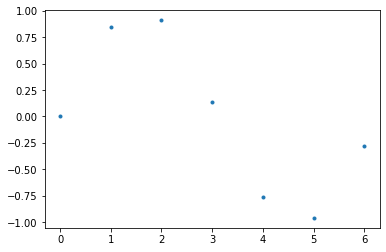

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(theta, s, '.')
#sub library 안에있는 figure라는 함수 사용하여 fig 만들어놓음
#밑에 전체가 figure라고 생각하면된다.
#add와 subplot를 통해 ax의 변수로 받음

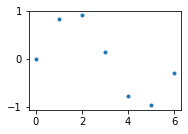

In [12]:
fig = plt.figure()
ax = fig.add_subplot(221)
ax.plot(theta, s, '.')

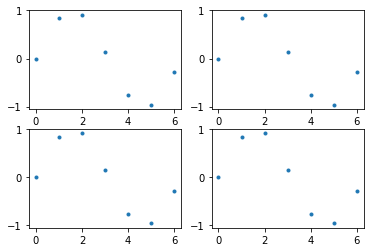

In [14]:
fig = plt.figure()
ax = fig.add_subplot(221)
ax.plot(theta, s, '.')
ax = fig.add_subplot(222)
ax.plot(theta, s, '.')
ax = fig.add_subplot(223)
ax.plot(theta, s, '.')
ax = fig.add_subplot(224)
ax.plot(theta, s, '.')

#221은 2 by 2로(2줄 2열)화면분리를 한다. 그 중 첫번째로 선택한다는 말임
#지금 ploting을 하는게 똑같이 그림으로 들어가서 그렇지 분할은 잘 되어있음.
#subplot밑에 실제 ploting하려는 x,y값 적어주면된다.
#지금 theta가 x값, s(sin 함수 통과한 결과값)는 y값. 갯수는 corresponding함
#잘보면 태극문양 따라서 sin함수라는 것을 알 수 있음
#문제는 너무 띄엄띄엄 
#arange numpy함수를 사용해서 default를 1로했는데 작게만들어주면 빽뺵해짐

In [16]:
theta= np.arange(0,2*np.pi,0.1)
theta

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2])

In [19]:
s = np.sin(theta)

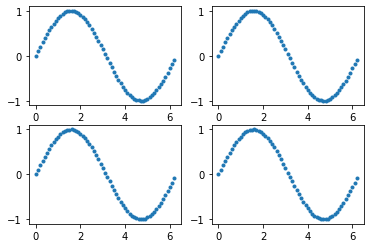

In [20]:
fig = plt.figure()
ax = fig.add_subplot(221)
ax.plot(theta, s, '.')
ax = fig.add_subplot(222)
ax.plot(theta, s, '.')
ax = fig.add_subplot(223)
ax.plot(theta, s, '.')
ax = fig.add_subplot(224)
ax.plot(theta, s, '.')
#훨씬 더 예쁘게 나온다.

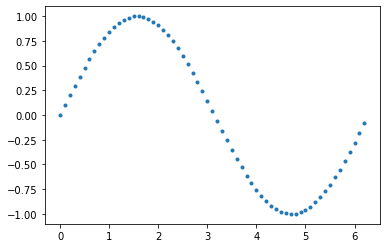

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111) #1 by 1로 화면 분할하고 첫번째 거 쓴다는 뜻
ax.plot(theta, s, '.')

Text(0, 0.5, 'value')

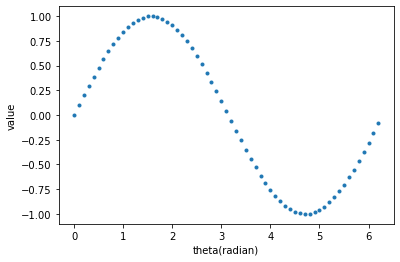

In [24]:
#x축 y축이 뭔지 아는 것이 중요함
fig = plt.figure()
ax = fig.add_subplot(111) 
ax.plot(theta, s, '.')
ax.set_xlabel('theta(radian)')
ax.set_ylabel('value')

#아래 그래프는 x축에서는 등간격. y축에서그렇지 않음 --> nonlineal
#즉 x,y의 관계가 line이아니다. line인 것은 1차함수 y=ax+b의 형태 
#어떤경우에 x축 y축에서 모두 등간격일까? lineal할때 즉 line 일때

Text(0, 0.5, 'value')

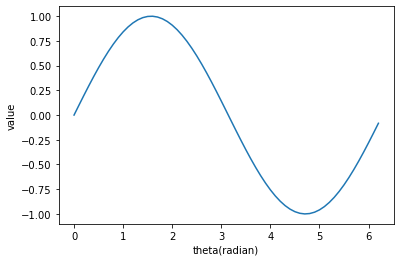

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111) 
ax.plot(theta, s, '-')
ax.set_xlabel('theta(radian)')
ax.set_ylabel('value')
#line으로 하고 싶을 때 .'.'에서 '-'으로 해주면된다. default는 line 임

In [29]:
theta= np.arange(0,2*np.pi*5,0.1)
s = np.sin(theta)

Text(0, 0.5, 'value')

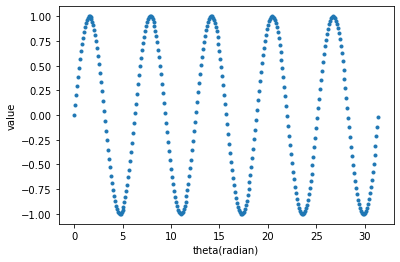

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111) 
ax.plot(theta, s, '.')
ax.set_xlabel('theta(radian)')
ax.set_ylabel('value')

In [31]:
#theta를 변화시켜보면서 sin에 넣어보면서 어떻게 ploting 되는지
#sin phasor가 어떤 역할 하는지 봤음
#그런데 시간의 개념이 빠져있음
#시간은 소리가 반드시 있어야하고, 소리도 시간이 있어야한다.
#위의 그래프로는 소리를 만들어 낼 수가 없음
#그만큼이 만약 1초동안이라면이라는 시간 개념이 들어가 있어야한다.
#그렇게 하는 방법이 시간부터 만드는것임

In [32]:
#시간 만들기
#time tick의 갯수를 먼저 index로 만든다고 생각하자
#만약 1초라면 time tick을 총 몇개 만드는 것일까? sr과 일치
#t=np.arange(1,sr)이 sr만큼 time tick을 만드는 것임
#0.5초인 경우에 t= np.arange(1,sr*dur)로 time tick을 만듦
#근데 이것은 시간은 아님 첫번째 두번째 time tick이라는 index를 준것임
#초를 주려면 sr로 나누어 주어야함
#10000개의 timetick을 만들었을 때 10000으로 나누어주면 10000번째가 1초가 되는 것
#따라서 첫번째 t의 초부터 마지막 t의 초까지 만들어지게됨.
#그런데 arange 함수는 제일 마지막 거를 빼니까 +1까지 해주면 완성

In [36]:
t=np.arange(1,sr*dur+1)/sr
#이제부터 t와 연결된 벡터를 만드는 것임

In [38]:
theta= t * 2*np.pi * freq
#t를 넣어서 theta로 확장시킨다.
#freq없다 생각할 때, t가 0-1일때 여기서 2pi곱하면 한바퀴 만들어내는 것임
#freq는 1초동안 도는 바퀴수

In [39]:
s=np.sin(theta)

Text(0, 0.5, 'real')

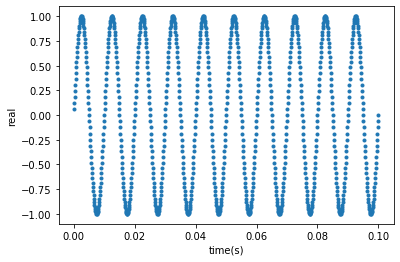

In [48]:
#지금은 time,theta, s 세 개 가지고 있음
fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000],s[0:1000],'.') #원하는 바에 따라 theta,s or t,s plot 할 수 있다.
ax.set_xlabel('time(s)')
ax.set_ylabel('real')
#time적을 때 대괄호 없으면 모든 벡터쓰는 것이고, 대괄호를 적는 것은 일부만 적는 것
#[0:1000]로하면 똑같은 수의 elements 가져와야함. corresponding해야함
#하나의 점이 ( , )의 2차원 벡터임.
#시험문제 - 점의 갯수는 ? 1000개이다.

ValueError: x and y must have same first dimension, but have shapes (1000,) and (999,)

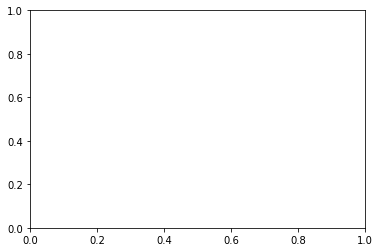

In [49]:
fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000],s[1:1000],'.')
ax.set_xlabel('time(s)')
ax.set_ylabel('real')
#t와 s의 갯수가 다르면 오류난다. (왜 실행이 안되는지 알아야함)

Text(0, 0.5, 'real')

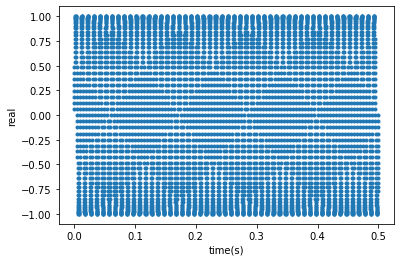

In [51]:
fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(t,s,'.')
ax.set_xlabel('time(s)')
ax.set_ylabel('real')
#너무 촘촘해서 태극문양이 보이지 않음

Text(0, 0.5, 'real')

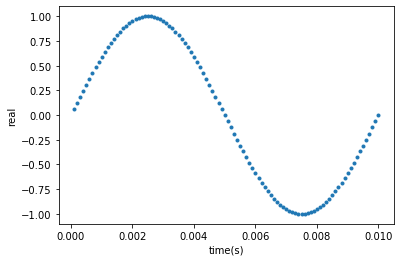

In [52]:
fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:100],s[0:100],'.')
ax.set_xlabel('time(s)')
ax.set_ylabel('real')

In [53]:
#이제부터 오일러 공식이용한 phasor 사용

In [55]:
c = np.exp(theta*1j) #np.exp가 상수e라고 생각하면된다., 1j=i임
c

array([0.99802673+6.27905195e-02j, 0.9921147 +1.25333234e-01j,
       0.98228725+1.87381315e-01j, ..., 0.9921147 -1.25333234e-01j,
       0.99802673-6.27905195e-02j, 1.        +1.96438672e-15j])

Text(0.5, 0, 'imag')

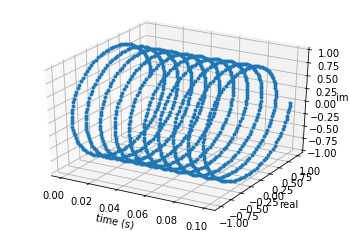

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.') 
#세개의 수가 들어감 3차원의 벡터., 총 1000개의 점이 찍힘
#x값은 t, a+bi의 형태에서 c.real은 a가져오고, c.imag은 b가져옴 
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

Text(0.5, 0, 'imag')

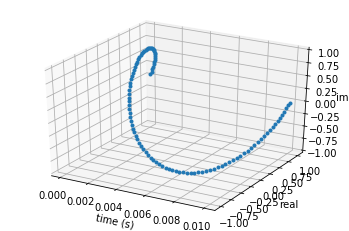

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:100], c.real[0:100], c.imag[0:100], '.') 
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

In [60]:
ipd.Audio(s,rate=sr)

In [61]:
ipd.Audio(c.imag, rate=sr)

In [62]:
ipd.Audio(c.real, rate=sr)

In [ ]:
#이번주 숙제. 다음시간에 pulsetrain 배울 것임
#직접 모든것을 코딩으로 만들 것임. 